In [1]:
import pandas as pd
import os
import seaborn as sns; sns.set(color_codes=True)
from matplotlib import pyplot as plt
import numpy as np

In [17]:
LFC3_Counts = pd.read_table("00.AnimalOnly_noD7/summarized_DA_KEGGs_noD7.txt", index_col=0)
LFC3_Counts.head()

,cow4,cow5,cow6,cow7,cow8,cow9,hum1,hum2,hum3,pig4,pig5,pig6,pig7,pig8,pig9
Function,,,,,,,,,,,,,,,
Energy metabolism,257,2251,3275,3586,4534,4790,1138,1145,2145,3063,653,257,3009,3683,4169
5'-bisphosphate nucleotidase (Sulfur metabolism),139,136,216,208,101,148,756,586,931,45,0,0,162,242,65
Purine metabolism,1167,4254,1010,360,1181,352,0,0,202,1018,1396,1291,871,933,565
Pyrimidine metabolism,0,0,0,0,0,0,354,472,1430,276,260,0,250,268,310
Two-component Signal Transduction,5307,3206,1238,1952,1106,1631,19929,17741,22849,16732,15815,17116,11843,13851,12379


In [18]:
MetaData = pd.read_table("MetaData_ForR.txt")

animal_data = MetaData.loc[9:, :]
GE = animal_data.GE.values


In [19]:
#Divide gene counts by GE by COLUMN
LFC3_Counts_Norm = LFC3_Counts.iloc[:,:].div(GE[:], axis=1)
LFC3_Counts_Norm.head()

,cow4,cow5,cow6,cow7,cow8,cow9,hum1,hum2,hum3,pig4,pig5,pig6,pig7,pig8,pig9
Function,,,,,,,,,,,,,,,
Energy metabolism,0.248747,1.703703,2.896077,2.535799,3.181263,3.520350,4.858265,3.565867,7.674419,2.641679,0.726508,0.224354,3.006324,3.281128,4.767296
5'-bisphosphate nucleotidase (Sulfur metabolism),0.134536,0.102934,0.191008,0.147085,0.070866,0.108771,3.227459,1.824977,3.330948,0.038810,0.000000,0.000000,0.161856,0.215594,0.074328
Purine metabolism,1.129522,3.219703,0.893141,0.254570,0.828644,0.258698,0.000000,0.000000,0.722719,0.877972,1.553147,1.127009,0.870225,0.831195,0.646083
Pyrimidine metabolism,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.511270,1.469947,5.116279,0.238036,0.289268,0.000000,0.249778,0.238757,0.354488
Two-component Signal Transduction,5.136569,2.426508,1.094761,1.380334,0.776021,1.198683,85.079406,55.250701,81.749553,14.430482,17.595292,14.941816,11.832469,12.339641,14.155517


In [20]:
#Get the AVERAGE of each row
row_avg = LFC3_Counts_Norm.iloc[:,:].mean(axis=1)

#Divide by the row AVG to normalize
LFC3_Counts_RowNorm = LFC3_Counts_Norm.iloc[:,:].div(row_avg,axis=0)
LFC3_Counts_RowNorm.head()

,cow4,cow5,cow6,cow7,cow8,cow9,hum1,hum2,hum3,pig4,pig5,pig6,pig7,pig8,pig9
Function,,,,,,,,,,,,,,,
Energy metabolism,0.083227,0.570032,0.968981,0.848438,1.064400,1.177853,1.625498,1.193082,2.567738,0.883864,0.243078,0.075065,1.005868,1.097813,1.595061
5'-bisphosphate nucleotidase (Sulfur metabolism),0.209576,0.160347,0.297547,0.229124,0.110393,0.169439,5.027627,2.842887,5.188839,0.060457,0.000000,0.000000,0.252134,0.335845,0.115786
Purine metabolism,1.282321,3.655256,1.013963,0.289007,0.940741,0.293694,0.000000,0.000000,0.820487,0.996742,1.763253,1.279468,0.987947,0.943637,0.733484
Pyrimidine metabolism,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.394326,2.328857,8.105790,0.377123,0.458291,0.000000,0.395726,0.378266,0.561621
Two-component Signal Transduction,0.241238,0.113961,0.051415,0.064827,0.036446,0.056296,3.995742,2.594841,3.839356,0.677726,0.826360,0.701740,0.555710,0.579529,0.664812


In [35]:
#LFC3_Counts_Norm.to_csv("summarized_DA_KEGGs_noD7.GEnorm.txt", sep='\t')
LFC3_Counts_RowNorm.to_csv("summarized_DA_KEGGs_noD7.GE_RowNorm.txt", sep='\t')

### Make a heat map using the normalized table

In [58]:
##Add a color row to the metadata table.
my_palette = dict(zip(MetaData["Type"].unique(), ["olive","yellow","saddlebrown","orange"]))
MetaData["colors"] = MetaData["Type"].map(my_palette)
MetaData.head()

#Create a dictionary mappinng the column names inthe heatmap to the colors
hm_pallate = dict(zip(list(MetaData.Sample), list(MetaData.colors)))

#Map the colors to the COLUMNS on the count matrix for heat map
col_colors = LFC3_Counts_RowNorm.columns.map(hm_pallate)
col_colors

Index(['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'saddlebrown', 'saddlebrown', 'saddlebrown', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange'],
      dtype='object')

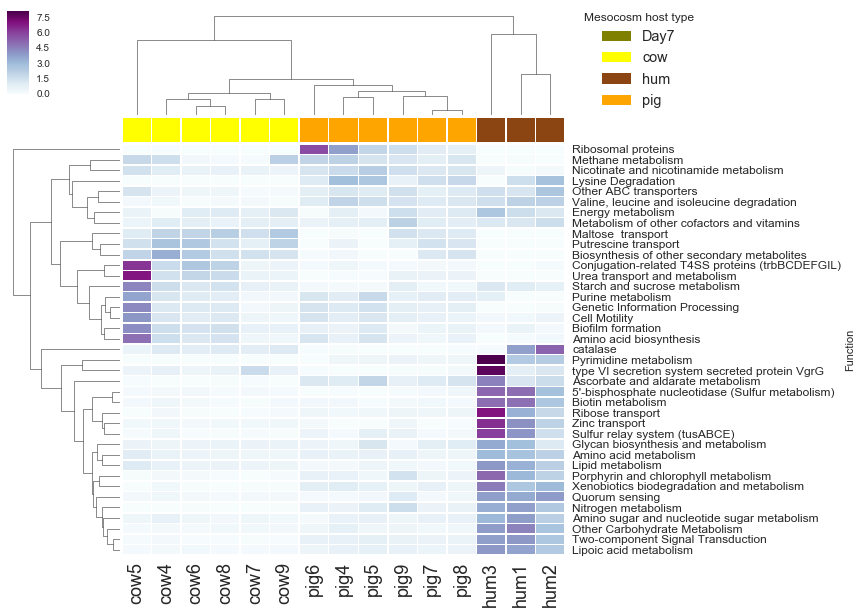

In [61]:
#Heatmap with Rows normalized by AVERAGE. Add the color bar legend in Adobe Illustrator
sns.set(font_scale=1.0)
colbar_kws = {'label':'GE relative to avg. across all samples'}
m = sns.clustermap(LFC3_Counts_RowNorm, cmap="BuPu", col_colors=col_colors, linewidths=.5)

#Add a legend for Column color bar:
for label in MetaData["Type"].unique():
    m.ax_row_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
m.ax_row_dendrogram.legend(loc="upper left", bbox_to_anchor=(5.0, 1.35), fontsize="large", title="Mesocosm host type")

#adjust the size and rotation of axes labels
plt.setp(m.ax_heatmap.get_yticklabels(), fontsize=12)  # For y axis
plt.setp(m.ax_heatmap.get_xticklabels(), rotation=90, fontsize=18) # For x axis
plt.show()

#bbos_inches makes sure the whole image is included in the pdf
#plt.savefig("DA_KEGGS_noD7_heatmap.pdf", format='pdf', bbox_inches='tight')

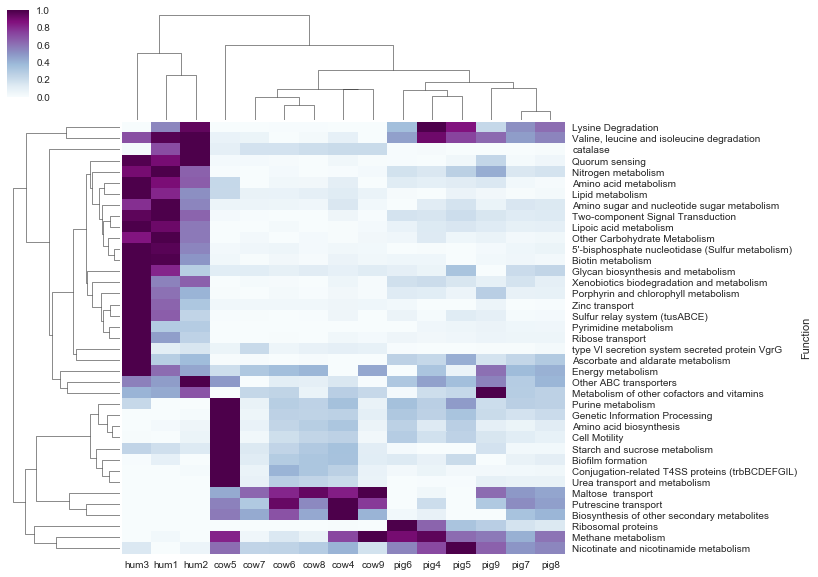

In [58]:
# Normalize ROWS wihth standard scale: Either 0 (rows) or 1 (columns). 
# Whether or not to standardize that dimension, 
# meaning for each row or column, subtract the minimum and divide each by its maximum.
sns.set_palette(sns.color_palette("coolwarm"))
sns.clustermap(LFC3_Counts_Norm, standard_scale=0,cmap="BuPu")

### Do the same thing for the D7 vs. Animal comparison

In [40]:
LFC3_Counts2 = pd.read_table("summarized_DA_KEGGS.txt", index_col=0)
LFC3_Counts2

,C7_D7,C8_D7,C9_D7,H1_D7,H2_D7,H3_D7,P7_D7,P8_D7,P9_D7,cow4,...,cow9,hum1,hum2,hum3,pig4,pig5,pig6,pig7,pig8,pig9
Function,,,,,,,,,,,,,,,,,,,,,
Quorum sensing,356,318,895,447,1576,1010,869,382,488,3064,...,2622,1885,2632,3087,6876,3830,5582,2728,3266,4409
Biofilm Formation,75556,109828,26730,59497,71032,79124,81283,21845,24989,61,...,373,39,8,0,113,60,963,581,362,107
Amino acid metabolism,47643,52741,21953,41535,34834,52046,52402,25183,31606,280,...,201,617,1066,887,10885,6535,4134,4184,5689,5878
Biosynthesis of amino acids,1306,966,755,599,499,340,865,752,1530,31214,...,16806,12247,14931,21641,46661,30905,42547,18505,21077,39475
Xenobiotics biodegradation and metabolism,8236,8358,8880,7157,4125,8366,9729,5192,6590,611,...,97,0,121,99,776,941,826,488,738,724
Metabolism of terpenoids and polyketides,8831,3731,11272,6532,2970,6143,7981,3840,4408,365,...,73,141,160,0,113,60,491,671,700,413
Other glycan biosynthesis and metabolism,4321,5369,2882,2258,3704,5356,5866,2529,2300,292,...,252,130,286,155,1528,1186,1449,508,551,1780
Cell wall/Peptidoglycan biosynthesis,177,0,226,111,0,0,78,0,146,2426,...,1842,600,2684,1391,11668,3519,7003,2455,2173,4477
Amino sugar and nucleotide sugar metabolism,1045,84,2070,431,620,245,1095,1530,2103,1174,...,302,31,673,346,3956,2109,3652,1057,1350,4150


In [38]:
#Metadata table ROWS must be in the same order as the Count matrix COLUMS!
GE2 = MetaData.GE.values
MetaData

,Sample,Type,GE,Subtype,Group,colors
0,C7_D7,Day7,392.78,Cow_D7,Day7,olive
1,C8_D7,Day7,356.77,Cow_D7,Day7,olive
2,C9_D7,Day7,192.22,Cow_D7,Day7,olive
3,H1_D7,Day7,314.18,Hum_D7,Day7,olive
4,H2_D7,Day7,233.80,Hum_D7,Day7,olive
5,H3_D7,Day7,327.84,Hum_D7,Day7,olive
6,P7_D7,Day7,330.21,Pig_D7,Day7,olive
7,P8_D7,Day7,248.59,Pig_D7,Day7,olive
8,P9_D7,Day7,297.60,Pig_D7,Day7,olive
9,cow4,cow,1033.18,cow,animal,yellow


In [41]:
#Divide gene counts by GE by COLUMN
LFC3_Counts_Norm2 = LFC3_Counts2.iloc[:,:].div(GE2[:], axis=1)
LFC3_Counts_Norm2.head()

,C7_D7,C8_D7,C9_D7,H1_D7,H2_D7,H3_D7,P7_D7,P8_D7,P9_D7,cow4,...,cow9,hum1,hum2,hum3,pig4,pig5,pig6,pig7,pig8,pig9
Function,,,,,,,,,,,,,,,,,,,,,
Quorum sensing,0.906360,0.891331,4.656123,1.422751,6.740804,3.080771,2.631659,1.536667,1.639785,2.965601,...,1.927006,8.047302,8.196823,11.044723,5.930193,4.261142,4.872939,2.725574,2.909629,5.041738
Biofilm Formation,192.362137,307.839785,139.059411,189.372334,303.815227,241.349439,246.155477,87.875618,83.968414,0.059041,...,0.274132,0.166496,0.024914,0.000000,0.097457,0.066754,0.840674,0.580483,0.322500,0.122356
Amino acid metabolism,121.296909,147.829134,114.207679,132.201286,148.990590,158.754270,158.692953,101.303351,106.202957,0.271008,...,0.147722,2.634051,3.319838,3.173524,9.387748,7.270644,3.608873,4.180280,5.068242,6.721555
Biosynthesis of amino acids,3.325017,2.707627,3.927791,1.906550,2.134303,1.037091,2.619545,3.025061,5.141129,30.211580,...,12.351359,52.283982,46.499533,77.427549,40.242693,34.383970,37.142408,18.488545,18.777172,45.140080
Xenobiotics biodegradation and metabolism,20.968481,23.426858,46.197066,22.779935,17.643285,25.518546,29.463069,20.885796,22.143817,0.591378,...,0.071289,0.000000,0.376830,0.354204,0.669260,1.046928,0.721076,0.487566,0.657473,0.827902


In [42]:
#Get the AVERAGE of each row
row_avg2 = LFC3_Counts_Norm2.iloc[:,:].mean(axis=1)

#Divide by the row AVG to normalize
LFC3_Counts_RowNorm2 = LFC3_Counts_Norm2.iloc[:,:].div(row_avg2,axis=0)
LFC3_Counts_RowNorm2.head()

,C7_D7,C8_D7,C9_D7,H1_D7,H2_D7,H3_D7,P7_D7,P8_D7,P9_D7,cow4,...,cow9,hum1,hum2,hum3,pig4,pig5,pig6,pig7,pig8,pig9
Function,,,,,,,,,,,,,,,,,,,,,
Quorum sensing,0.241852,0.237842,1.242436,0.379646,1.798711,0.822071,0.702230,0.410043,0.437559,0.791339,...,0.514201,2.147336,2.187234,2.947165,1.582408,1.137040,1.300291,0.727290,0.776403,1.345334
Biofilm Formation,2.571223,4.114763,1.858748,2.531259,4.060968,3.226015,3.290255,1.174596,1.122370,0.000789,...,0.003664,0.002225,0.000333,0.000000,0.001303,0.000892,0.011237,0.007759,0.004311,0.001635
Amino acid metabolism,2.355625,2.870889,2.217950,2.567391,2.893445,3.083059,3.081868,1.967344,2.062496,0.005263,...,0.002869,0.051154,0.064472,0.061631,0.182313,0.141198,0.070085,0.081182,0.098427,0.130535
Biosynthesis of amino acids,0.152258,0.123987,0.179860,0.087304,0.097733,0.047490,0.119953,0.138523,0.235421,1.383438,...,0.565589,2.394170,2.129291,3.545536,1.842780,1.574499,1.700812,0.846621,0.859838,2.067039
Xenobiotics biodegradation and metabolism,2.134347,2.384581,4.702322,2.318731,1.795880,2.597490,2.998996,2.125930,2.253982,0.060195,...,0.007256,0.000000,0.038357,0.036054,0.068123,0.106565,0.073397,0.049629,0.066923,0.084271


In [43]:
LFC3_Counts_Norm2.to_csv("summarized_DA_KEGGs.GEnorm.txt", sep='\t')
LFC3_Counts_RowNorm2.to_csv("summarized_DA_KEGGs.GE_RowNorm.txt", sep='\t')

In [64]:
#Map the colors to the COLUMNS on the count matrix for heat map
col_colors = LFC3_Counts_RowNorm2.columns.map(hm_pallate)
col_colors

Index(['olive', 'olive', 'olive', 'olive', 'olive', 'olive', 'olive', 'olive',
       'olive', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'saddlebrown', 'saddlebrown', 'saddlebrown', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange'],
      dtype='object')

<Figure size 18720x3600 with 0 Axes>

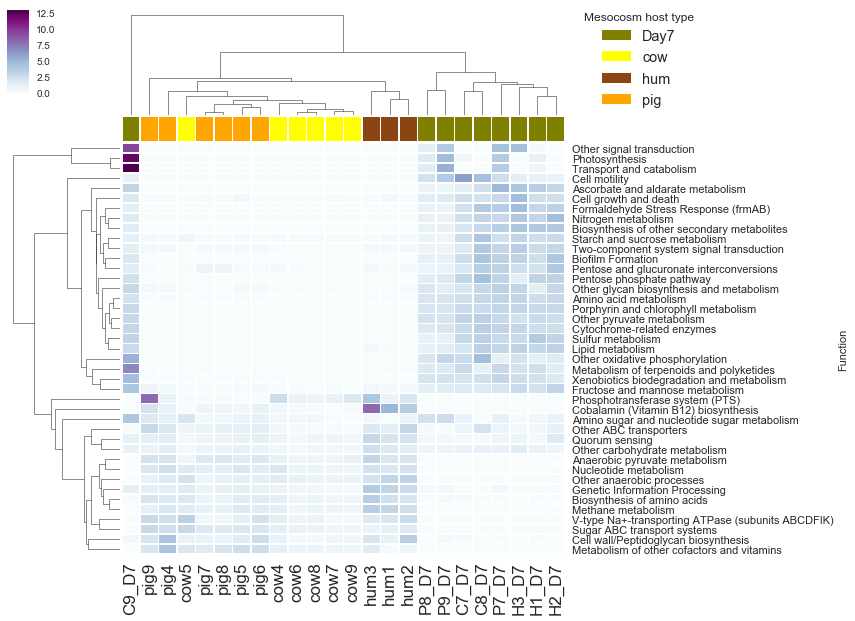

In [66]:
plt.figure(figsize = (260,50))
m = sns.clustermap(LFC3_Counts_RowNorm2, cmap="BuPu", col_colors=col_colors, yticklabels=1, linewidths=.5)

#Add a legend for Column color bar:
for label in MetaData["Type"].unique():
    m.ax_row_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
m.ax_row_dendrogram.legend(loc="upper left", bbox_to_anchor=(5.0, 1.35), fontsize="large", title="Mesocosm host type")

#adjust the size and rotation of axes labels
plt.setp(m.ax_heatmap.get_yticklabels(), fontsize=11)  # For y axis
plt.setp(m.ax_heatmap.get_xticklabels(), rotation=90, fontsize=17) # For x axis
#plt.show()

plt.savefig("DA_KEGGS_heatmap.pdf", format='pdf', bbox_inches='tight')